# Teoria Bio-ritmo (pseudociência)

Os ciclos são regidos pela função trigonométrica

$f(t)=sen\left (\frac{2.\pi .t}{p}  \right )$

onde $t > 0$ é o tempo de vida de uma pessoa, em dias, e a constante positiva $p$ é o período de cada tipo de ciclo.

In [1]:
#@title Calculadora de Bio-ritmo
#@markdown Coloque a data de nascimento
#@markdown <br> Formato: ano / mes / dia

data = '1982-06-04'  #@param {type: "date"}
#@markdown ---


# Refêrencias

https://en.wikipedia.org/wiki/Biorhythm_(pseudoscience)

http://www.biociclos.com.br/old/noticias/segunda_vida.htm

<hr>

# Classe

In [2]:
from datetime import datetime, timedelta
import math
import pandas as pd
import matplotlib.pyplot as plt

class bioritmo:

    def __init__(self,born:datetime):
      self.__born = born
      self.__date = datetime.today()
      self.__n = 2

    @property
    def born(self):
         return self.__born

    def setDate(self,date:datetime):
      self.__date = date

    def setRound(self,n:int):
      self.__n = n

    def __days(self):
      return (self.__date - self.__born).days

    def __calc(self,n:int,data=None)->float:
      return round(math.sin(2*math.pi*self.__days()/n),self.__n)

    @property
    def physical(self)->float:
      return self.__calc(23)
    
    @property
    def emotional(self)->float:
      return self.__calc(28)
    
    @property
    def intellectual(self)->float:
      return self.__calc(33)
    
    @property
    def average(self)->float:
      return round( (self.physical + self.emotional + self.intellectual) / 3 , self.__n )

    @property
    def intuitive(self)->float:
      return self.__calc(38)

    @property
    def aesthetic(self)->float:
      return self.__calc(43)

    @property
    def awareness(self)->float:
      return self.__calc(48)

    @property
    def spiritual(self)->float:
      return self.__calc(53)    

    @property
    def mastery(self)->float:
      return round( (self.physical + self.intellectual) / 2 , self.__n)  

    @property
    def passion(self)->float:
      return round( (self.physical + self.emotional) / 2 , self.__n)  

    @property
    def wisdom(self)->float:
      return round( (self.emotional + self.intellectual) / 2 , self.__n)  

    @property
    def perception(self)->float:
      return round( (self.physical + self.intuitive) / 2 , self.__n)  

    @property
    def psychic(self)->float:
      return round( (self.emotional + self.intuitive) / 2 , self.__n)  

    @property
    def success(self)->float:
      """ Return success rate for date """
      return round( (self.intellectual + self.intuitive) / 2 , self.__n)

    @property
    def secondLife(self)->datetime:
      return self.__born + timedelta(days=21252)

In [3]:
ritmo = bioritmo(datetime.fromisoformat(data))
print(f'Data da Segunda Vida {ritmo.secondLife.strftime("%d/%m/%Y")}')

Data da Segunda Vida 10/08/2040


In [4]:
col=["Date",
         "Physical", "Emotional","Intellectual",
         "Average", "Intuitive",
         "Aesthetic", "Awareness", "Spiritual",
         "Mastery","Passion", "Wisdow",
         "Perception", "Psychic", "Succes"]

dt =[]
for i in range(-30,30):
  d = datetime.today() + timedelta(days=i)
  ritmo.setDate(d)
  dt.append([d.strftime("%d/%m"),
             ritmo.physical, ritmo.emotional, ritmo.intellectual,
             ritmo.average, ritmo.intuitive,
             ritmo.aesthetic, ritmo.awareness, ritmo.spiritual,
             ritmo.mastery, ritmo.passion, ritmo.wisdom,
             ritmo.perception, ritmo.psychic, ritmo.success ])

In [6]:
dt=pd.DataFrame(dt, columns=col)
dt.tail()

,Date,Physical,Emotional,Intellectual,Average,Intuitive,Aesthetic,Awareness,Spiritual,Mastery,Passion,Wisdow,Perception,Psychic,Succes
55,29/04,-0.82,-0.00,-0.76,-0.53,-0.16,-0.42,-0.71,-0.12,-0.79,-0.41,-0.38,-0.49,-0.08,-0.46
56,30/04,-0.94,-0.22,-0.87,-0.68,-0.32,-0.29,-0.79,-0.00,-0.91,-0.58,-0.55,-0.63,-0.27,-0.59
57,01/05,-1.00,-0.43,-0.95,-0.79,-0.48,-0.15,-0.87,0.12,-0.97,-0.71,-0.69,-0.74,-0.45,-0.71
58,02/05,-0.98,-0.62,-0.99,-0.86,-0.61,0.00,-0.92,0.23,-0.98,-0.80,-0.80,-0.79,-0.61,-0.80
59,03/05,-0.89,-0.78,-1.00,-0.89,-0.74,0.15,-0.97,0.35,-0.95,-0.83,-0.89,-0.81,-0.76,-0.87


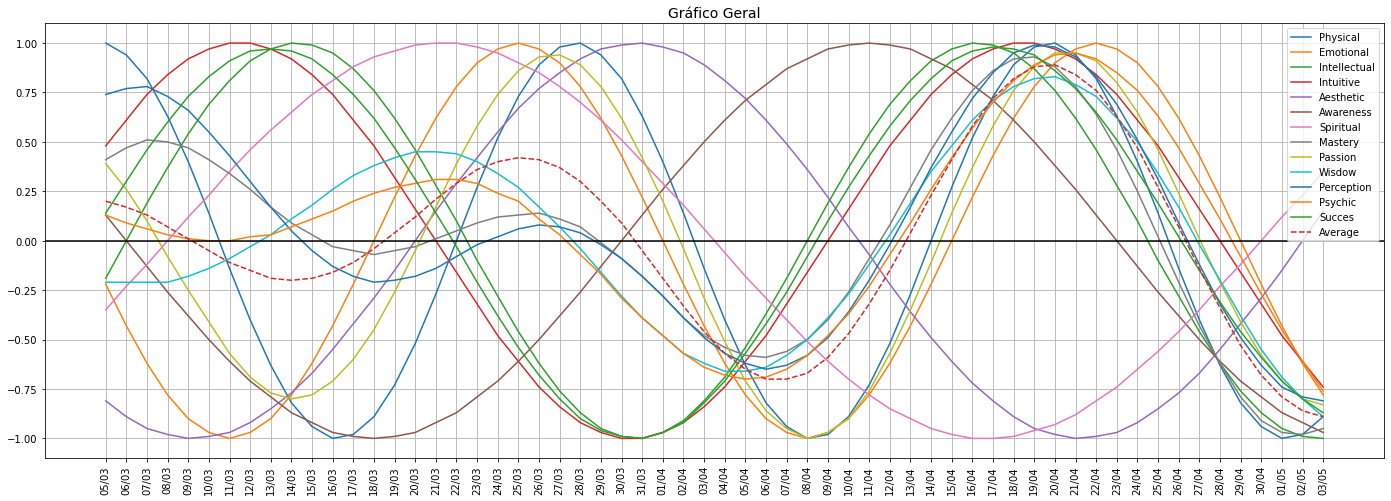

In [52]:
fig, ax = plt.subplots()
ax.grid(True)
ax.set_xticks(dt.index)
ax.set_xticklabels(dt['Date'], rotation=90)
ax.set_title("Gráfico Geral", fontsize=14)
ax.plot(dt[[ "Physical", "Emotional","Intellectual","Intuitive","Aesthetic", "Awareness", "Spiritual",
              "Mastery","Passion", "Wisdow","Perception", "Psychic", "Succes"]])
ax.plot(dt[['Average']],linestyle='dashed')
ax.legend(["Physical", "Emotional","Intellectual","Intuitive","Aesthetic", "Awareness", "Spiritual",
          "Mastery","Passion", "Wisdow","Perception", "Psychic", "Succes",'Average'])
plt.axhline(y = 0, color = 'k')
fig.set_size_inches(24,8)
fig.show()

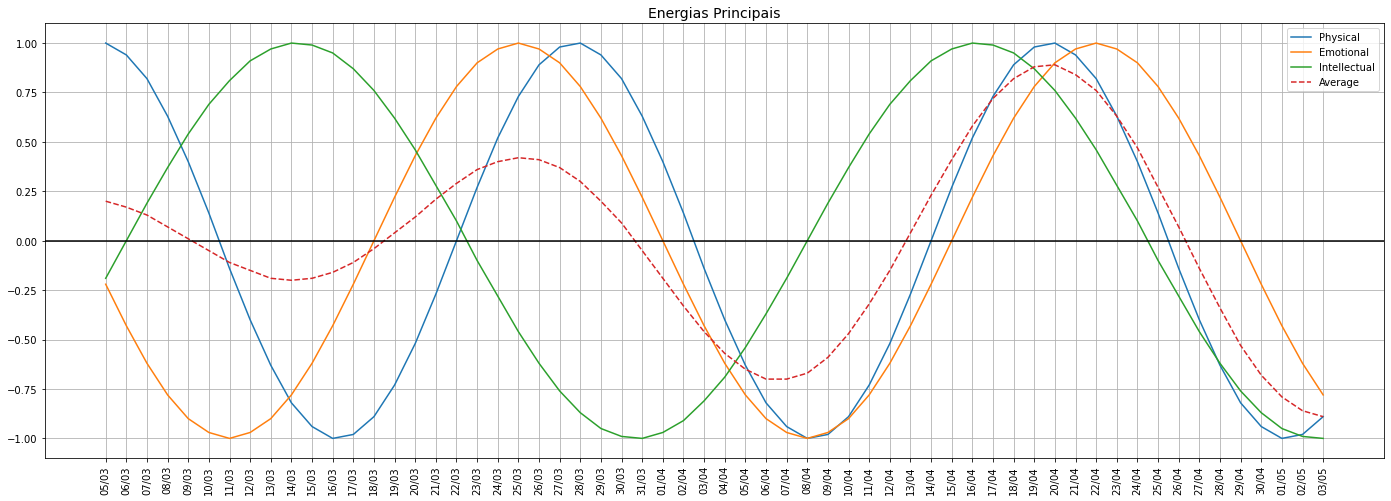

In [53]:
fig, ax = plt.subplots()
ax.grid(True)
ax.set_xticks(dt.index)
ax.set_xticklabels(dt['Date'], rotation=90)
ax.set_title("Energias Principais", fontsize=14)
ax.plot(dt[['Physical','Emotional','Intellectual']])
ax.plot(dt[['Average']],linestyle='dashed')
ax.legend(['Physical','Emotional','Intellectual','Average'])
plt.axhline(y = 0, color = 'k')
fig.set_size_inches(24,8)
fig.show()

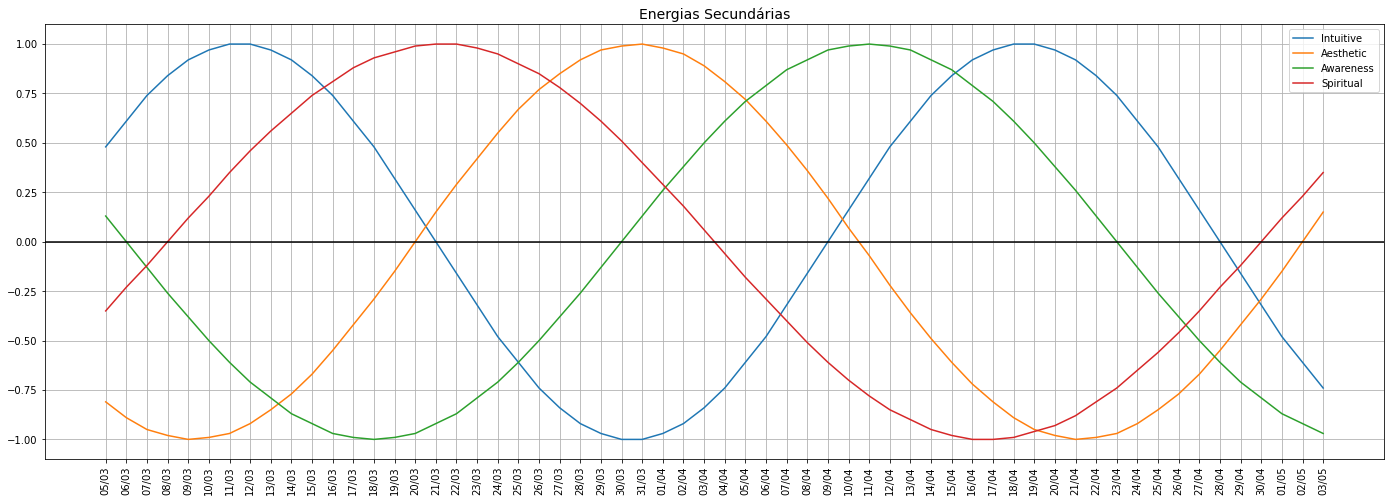

In [54]:
fig, ax = plt.subplots()
ax.grid(True)
ax.set_xticks(dt.index)
ax.set_xticklabels(dt['Date'], rotation=90)
ax.set_title("Energias Secundárias", fontsize=14)
ax.plot(dt[["Intuitive","Aesthetic", "Awareness", "Spiritual"]])
ax.legend(["Intuitive","Aesthetic", "Awareness", "Spiritual"])
plt.axhline(y = 0, color = 'k')
fig.set_size_inches(24,8)
fig.show()

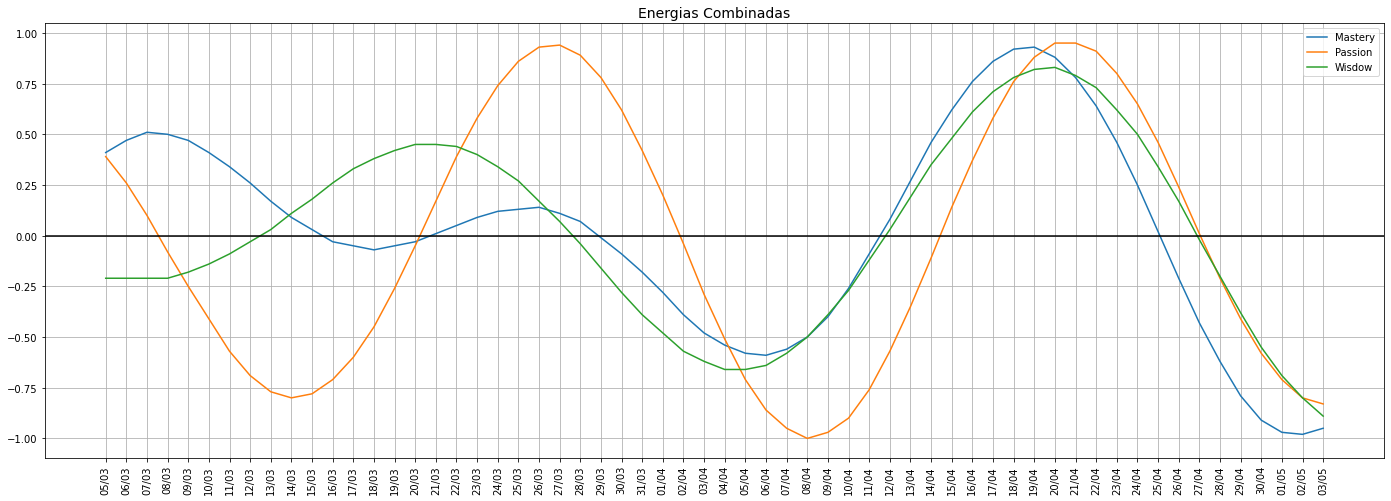

In [55]:
fig, ax = plt.subplots()
ax.grid(True)
ax.set_xticks(dt.index)
ax.set_xticklabels(dt['Date'], rotation=90)
ax.set_title("Energias Combinadas", fontsize=14)
ax.plot(dt[["Mastery","Passion", "Wisdow"]])
ax.legend(["Mastery","Passion", "Wisdow"])
plt.axhline(y = 0, color = 'k')
fig.set_size_inches(24,8)
fig.show()

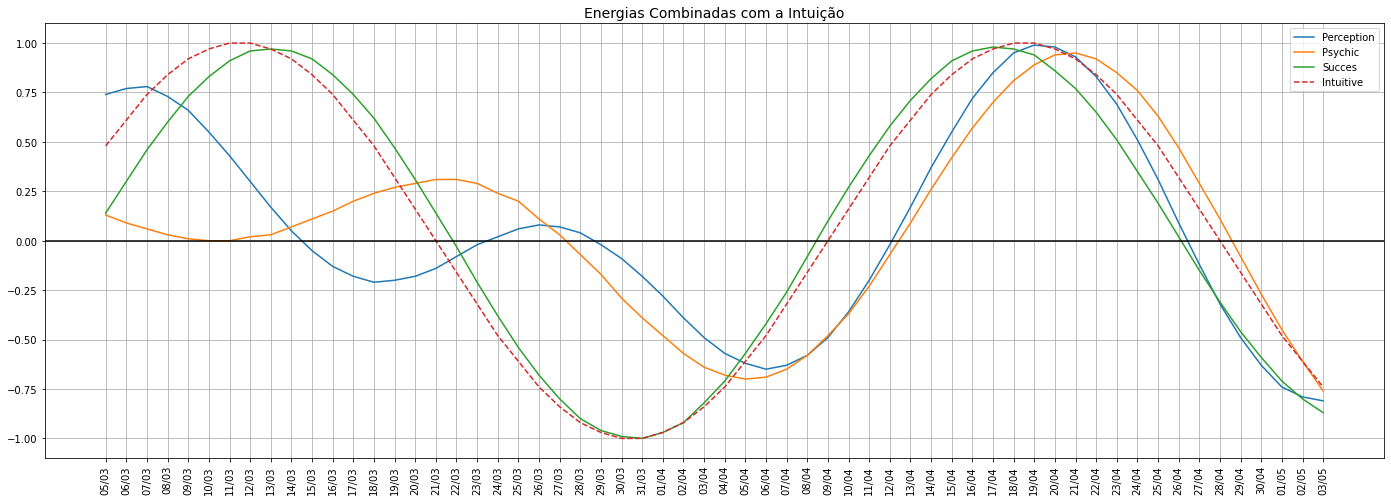

In [56]:
fig, ax = plt.subplots()
ax.grid(True)
ax.set_xticks(dt.index)
ax.set_xticklabels(dt['Date'], rotation=90)
ax.set_title("Energias Combinadas com a Intuição", fontsize=14)
ax.plot(dt[["Perception", "Psychic", "Succes"]])
ax.plot(dt[['Intuitive']],linestyle='dashed')
ax.legend(["Perception", "Psychic", "Succes",'Intuitive'])
plt.axhline(y = 0, color = 'k')
fig.set_size_inches(24,8)
fig.show()